# Trabalho 2 - Aprendizado de Máquina



# Pré-processamento
### Dataset de músicas menos ouvidas no spotify

## Aquisição

Dataset disponível em: https://www.kaggle.com/datasets/estienneggx/spotify-unpopular-songs

Acesso em 10/09/22

In [89]:
import pandas as pd
import numpy as np

In [90]:
url = "https://drive.google.com/file/d/1LUKaVVAC6ufRCJiQUh1LuxItreNdPV0S/view?usp=sharing"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
dataset = pd.read_csv(url, encoding='utf-8', na_values=['nan'])

Pré visualização de todas as colunas

In [91]:
pd.set_option('display.max_columns', None)

In [92]:
dataset.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,explicit,popularity,track_name,track_artist,track_id
0,0.530,0.770,4,-6.633,0,0.0389,0.284,0.501000,0.744,0.623,120.144,225696,False,2,No Regrets,James Reeder,6f2c4a9lNx8aowZJngv7cJ
1,0.565,0.730,1,-6.063,1,0.0730,0.365,0.000000,0.237,0.511,130.026,158093,False,2,Wild Life,James Reeder,3fTs52jsDzSuVLsifxNKO8
2,0.427,0.546,4,-8.727,1,0.0849,0.539,0.015200,0.368,0.435,78.345,167262,False,2,Fangs,James Reeder,6NPafqavrv0icaIHMQnXDy
3,0.421,0.531,7,-5.516,1,0.0262,0.706,0.000208,0.110,0.383,85.080,236832,False,2,Afterburner,James Reeder,3vGmhxveURgmlZStvo0uc1
4,0.537,0.804,8,-7.378,0,0.1570,0.379,0.000489,0.323,0.543,139.950,239400,False,2,Hellfire Rising,James Reeder,4O2qRbfCHzMMgfbw9DBdGf


Informações dos tipos das colunas e quantidade de valores nulos

In [93]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10877 entries, 0 to 10876
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      10877 non-null  float64
 1   energy            10877 non-null  float64
 2   key               10877 non-null  int64  
 3   loudness          10877 non-null  float64
 4   mode              10877 non-null  int64  
 5   speechiness       10877 non-null  float64
 6   acousticness      10877 non-null  float64
 7   instrumentalness  10877 non-null  float64
 8   liveness          10877 non-null  float64
 9   valence           10877 non-null  float64
 10  tempo             10877 non-null  float64
 11  duration_ms       10877 non-null  int64  
 12  explicit          10877 non-null  bool   
 13  popularity        10877 non-null  int64  
 14  track_name        10877 non-null  object 
 15  track_artist      10877 non-null  object 
 16  track_id          10877 non-null  object

In [94]:
dataset.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity
count,10877.000000,10877.000000,10877.000000,10877.000000,10877.000000,10877.000000,10877.000000,10877.000000,10877.000000,10877.000000,10877.000000,1.087700e+04,10877.000000
mean,0.572519,0.549771,5.223315,-11.359059,0.640986,0.137965,0.354163,0.232943,0.212137,0.464579,117.827552,2.055782e+05,3.078974
std,0.203501,0.257469,3.620319,6.788808,0.479733,0.160087,0.340914,0.369040,0.190303,0.273150,31.193596,1.067631e+05,4.007018
min,0.000000,0.000020,0.000000,-51.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.693000e+03,0.000000
25%,0.442000,0.379000,2.000000,-13.796000,0.000000,0.038400,0.036500,0.000000,0.099300,0.238000,92.996000,1.511520e+05,1.000000
50%,0.602000,0.569000,5.000000,-9.450000,1.000000,0.058900,0.233000,0.000133,0.129000,0.468000,117.141000,1.975220e+05,2.000000
75%,0.730000,0.745000,9.000000,-6.726000,1.000000,0.188000,0.657000,0.517000,0.268000,0.685000,138.934000,2.444280e+05,3.000000
max,0.986000,1.000000,11.000000,3.108000,1.000000,0.962000,0.996000,1.000000,0.999000,0.995000,239.500000,3.637277e+06,18.000000


Verificação de dados faltantes

In [95]:
dataset.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
explicit            0
popularity          0
track_name          0
track_artist        0
track_id            0
dtype: int64

Distribuição de níveis de popularidade das faixas

In [96]:
dataset["popularity"].value_counts()

0     2694
2     2146
1     2101
3     1494
14     544
4      457
5      309
13     248
6      212
15     152
7      137
8      112
10      80
9       59
12      59
11      45
16      19
17       5
18       4
Name: popularity, dtype: int64

Removendo colunas com atributos nominais

In [97]:
dataset.drop(columns=['track_name', 'track_id', 'track_artist'], inplace=True)

## Normalização dos atributos e conversão para binário

In [98]:
dataset["explicit"].unique()

array([False,  True])

In [99]:
dataset.loc[dataset['explicit']=='False', 'explicit'] = 0
dataset.loc[dataset['explicit']=='True', 'explicit'] = 1

dataset["explicit"] = dataset["explicit"].astype(float)

In [100]:
dataset.explicit.value_counts()

0.0    7945
1.0    2932
Name: explicit, dtype: int64

Normalizando atributos numéricos

In [101]:
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaled_values = scaler.fit_transform(dataset) 
#df_normalized = pd.DataFrame(scaled_values, columns = dataset.columns)


In [102]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(dataset) 
df_normalized = pd.DataFrame(scaled_values, columns = dataset.columns)

# Visualização dos dados

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

Na matriz de correlação entre os atributos é possível observar algumas correlações interessantes, apesar de intuitivas.
Algumas variáveis que possuem forte correlação:


*   **loudness** e **energy**

Uma correlação intuitiva pelo fato de quanto maior o volume de uma música, em decibéis, maior a sua intensidade e energia ou vice-versa.

*   **explicit** e **speechiness**

Outra correlação que é intuitiva, se uma música é explícita, então haverá mais presença de recitações nela ou vice-versa.

Outros atributos que apresentaram correlação negativa:
*   **energy** e **acousticness**

Indicando que música acústicas possuem menos intensidade em suas músicas e também vice-versa.

*   **loudness** e **acousticness**

Indicando que músicas acústicas não possuem decibéis altos em suas músicas e vice-versa.


*   **loudness** e **intrumentalness**

Indicando que quanto músicas instrumentais possuem menos decibéis também e vice-versa.


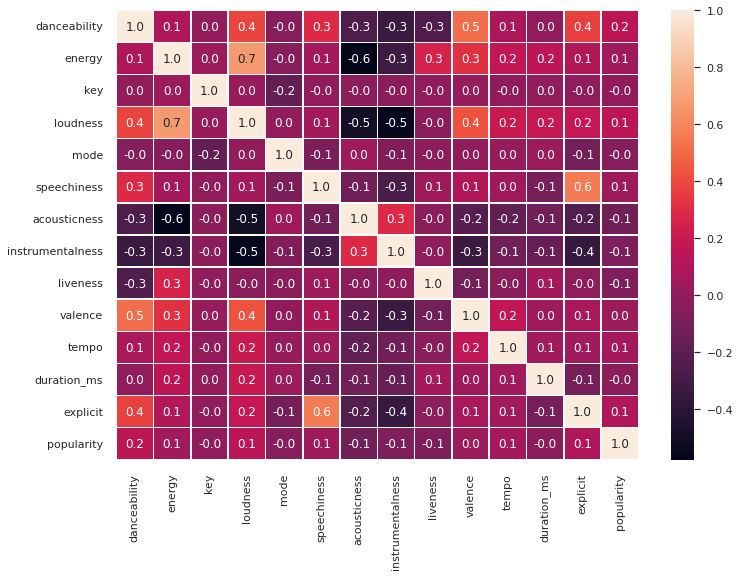

In [104]:
correlation = df_normalized.corr()
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

Gráficos demonstrando relação entre as variáveis que apresentaram maior correlação

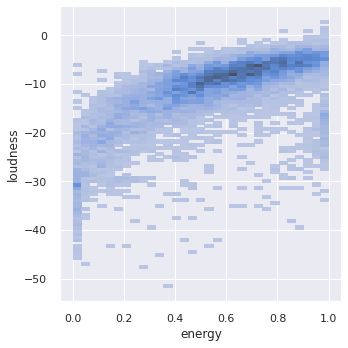

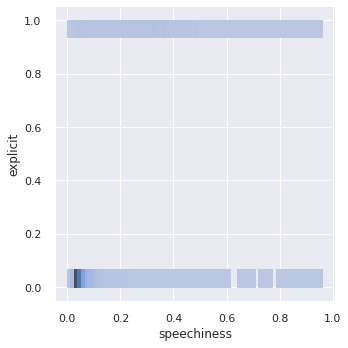

In [105]:
sns.displot(data=dataset, x="energy", y="loudness")
sns.displot(data=dataset, x="speechiness", y="explicit")

Gráficos demonstrando relação entre as variáveis que apresentaram menor correlação

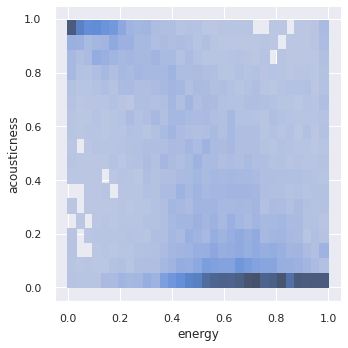

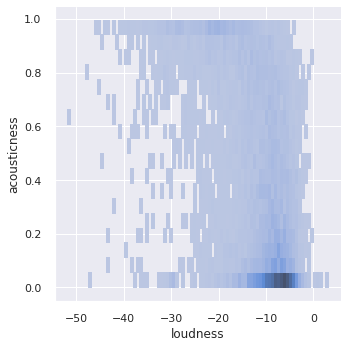

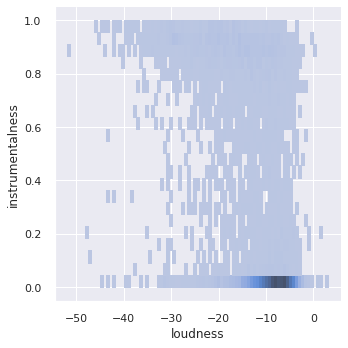

In [106]:
sns.displot(data=dataset, x="energy", y="acousticness")
sns.displot(data=dataset, x="loudness", y="acousticness")
sns.displot(data=dataset, x="loudness", y="instrumentalness")

Distribuição do range de popularidade das faixas musicais, mostrando a predominância de músicas com 0 de popularidade no dataset.

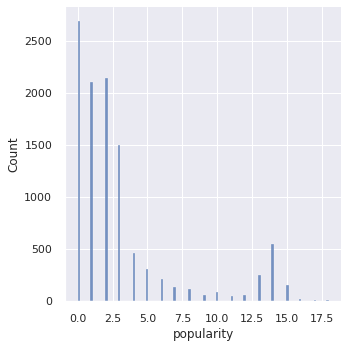

In [107]:
sns.set(rc={'figure.figsize':(8,5)})
sns.displot(data=dataset, x="popularity")

Algumas possíveis interpretações em relação as distribuições bivariadas plotadas:

A maioria das músicas estão entre 50 e 200 batidas por minuto, em toda a faixa parece ter uma distribuição quase uniforme dos dados, indicando não haver relação entre tempo e valence, assim como músicas dançantes. O gráfico nos permite concluir também que quanto a maior a valência, mais dançante ela é, o que já era esperado intuitivamente. Além disso, é possível visualizar a formação de uma seta na relação entre danceabilidade e tempo, podendo indicar que músicas totalmente dançantes, estão situadas na faixa de 100 a 110 BPM.

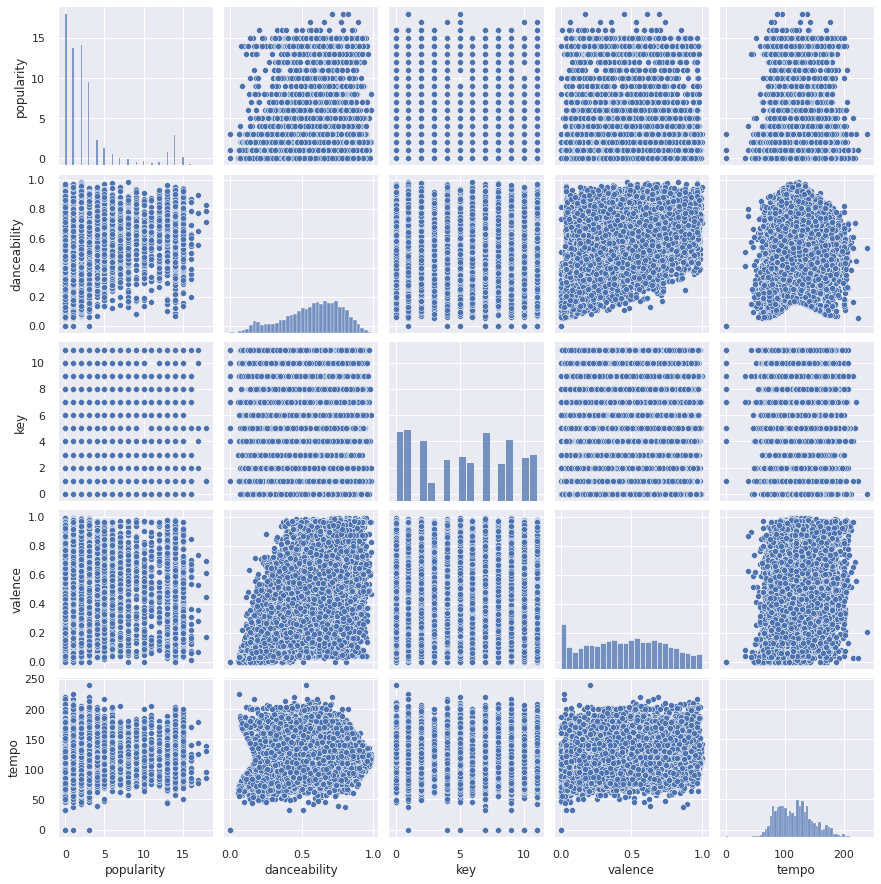

In [108]:
dataset_new = dataset[['popularity', 'danceability','key', 'valence', 'tempo']]

g=sns.pairplot(dataset_new, kind="scatter")
plt.show()

## Principal Component Analysis

Redução de dimensionalidade dos dados usando Principal Component Anaylisis, realização transformação ortogonal para obter dados bidimensionais(também possibilitando a visualização em um plano)

In [109]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
pca = PCA(2)

data = pca.fit_transform(df_normalized)
data.shape

(10877, 2)

# Treinamento

## Elbow Method

https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

The K-Elbow Visualizer implements the “elbow” method of selecting the optimal number of clusters for K-means clustering. K-means is a simple unsupervised machine learning algorithm that groups data into a specified number (k) of clusters. Because the user must specify in advance what k to choose, the algorithm is somewhat naive – it assigns all members to k clusters even if that is not the right k for the dataset.

The elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters. By default, the distortion score is computed, the sum of square distances from each point to its assigned center. Other metrics can also be used such as the silhouette score, the mean silhouette coefficient for all samples or the calinski_harabasz score, which computes the ratio of dispersion between and within clusters.

When these overall metrics for each model are plotted, it is possible to visually determine the best value for k. If the line chart looks like an arm, then the “elbow” (the point of inflection on the curve) is the best value of k. The “arm” can be either up or down, but if there is a strong inflection point, it is a good indication that the underlying model fits best at that point.

In [110]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
kmeans = KMeans(random_state=0)

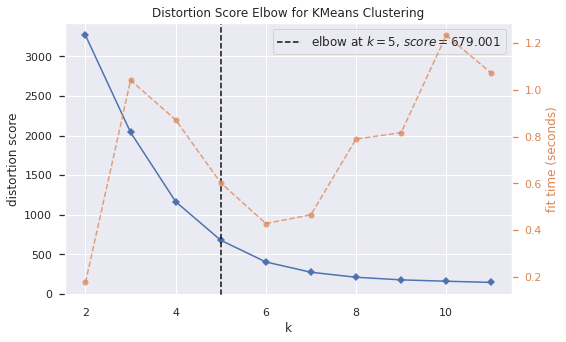

In [111]:
model = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,12))

visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## Clusterização K-means

In [112]:
kmeans = KMeans(4, random_state=0)
kmeans.fit(data)

KMeans(n_clusters=4, random_state=0)

In [113]:
pred_kmeans = kmeans.predict(data)

## Clusterização DBSCAN

Estimativa do valor de epsilon ideal(distância média entre pontos e seus n vizinhos) para o algoritmo DBSCAN usando o método do cotovelo 

In [114]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


0.025749828665221183


<Figure size 360x360 with 0 Axes>

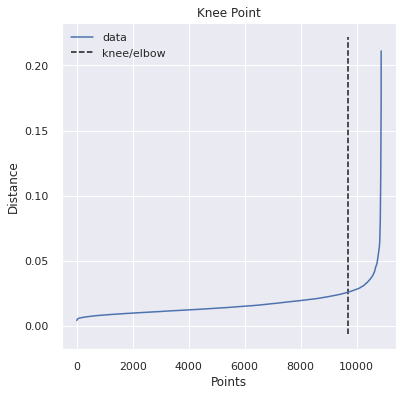

In [115]:
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(data)

distances, indices = neighbors.kneighbors(data)
distances = np.sort(distances[:,10], axis=0)

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

In [116]:
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [117]:
from sklearn.cluster import DBSCAN
import hdbscan

Os valores de MinPts são padrões(MinPts=4) pois os dados estão 2 dimensões, como consta em Ester et al., 1996

In [119]:
hdbscan_params_clusterer = hdbscan.HDBSCAN(cluster_selection_epsilon=0.22,min_samples=5,min_cluster_size=20)
pred_hdbscan_params = hdbscan_params_clusterer.fit_predict(data)

hdbscan_clusterer = hdbscan.HDBSCAN()
pred_hdbscan = hdbscan_clusterer.fit_predict(data)

dbscan_clusterer = DBSCAN()
pred_dbscan = dbscan_clusterer.fit_predict(data)

# Visualização dos clusters

"Audio characteristics of unpopular songs as well as their popularity (Spotify popularity ranges from 0 to 100 and is based on the playback rate, as well as the total and recent amount of listens)"

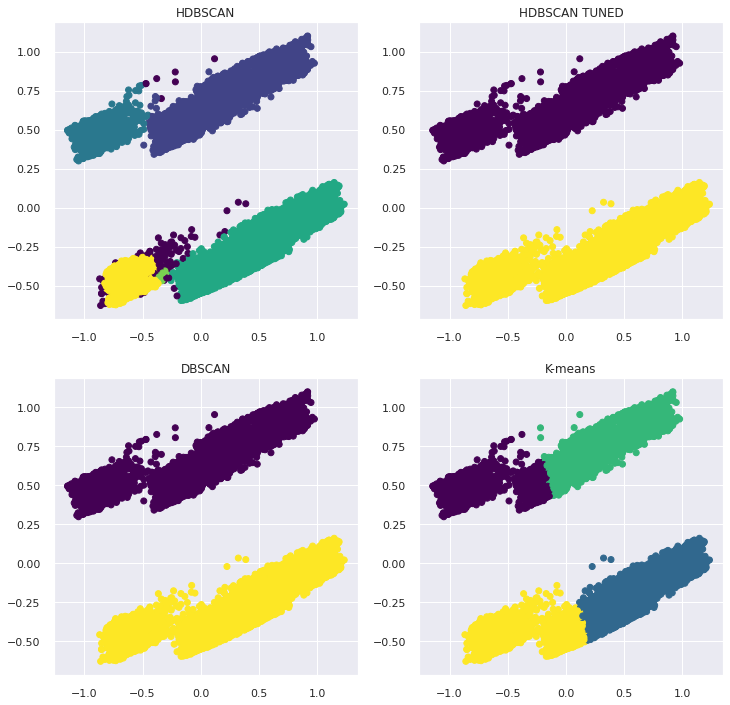

In [120]:
plt.figure(figsize=(12, 12))

plt.subplot(221)
plt.scatter(data[:,0], data[:,1], c=pred_hdbscan, cmap="viridis")
plt.xlabel("")
plt.ylabel("")
plt.title("HDBSCAN")

plt.subplot(222)
plt.scatter(data[:,0], data[:,1], c=pred_hdbscan_params, cmap="viridis")
plt.xlabel("")
plt.ylabel("")
plt.title("HDBSCAN TUNED")

plt.subplot(223)
plt.scatter(data[:,0], data[:,1], c=pred_dbscan, cmap="viridis")
plt.xlabel("")
plt.ylabel("")
plt.title("DBSCAN")

plt.subplot(224)
plt.scatter(data[:,0], data[:,1], c=pred_kmeans, cmap="viridis")
plt.xlabel("")
plt.ylabel("")
plt.title("K-means")

plt.show()

In [121]:
import scipy.cluster.hierarchy as sch

#dendrogram = sch.dendrogram(sch.linkage(df_normalized, method = 'ward'))
#plt.title('Dendrogam', fontsize = 20)
#plt.xlabel('Songs Impopulars')
#plt.ylabel('Ecuclidean Distance')
#plt.show()

# Interpretação dos dados

Dicionário para substituir indexes pelos nomes dos atributos

In [122]:
index_label = {
    0: 'danceability', 
    1: 'energy', 
    2: 'key', 
    3: 'loudness', 
    4: 'mode', 
    5: 'speechiness',
    6: 'acousticness', 
    7: 'instrumentalness', 
    8: 'liveness', 
    9: 'valence', 
    10: 'tempo',
    11: 'duration_ms', 
    12: 'explicit', 
    13: 'popularity'
}

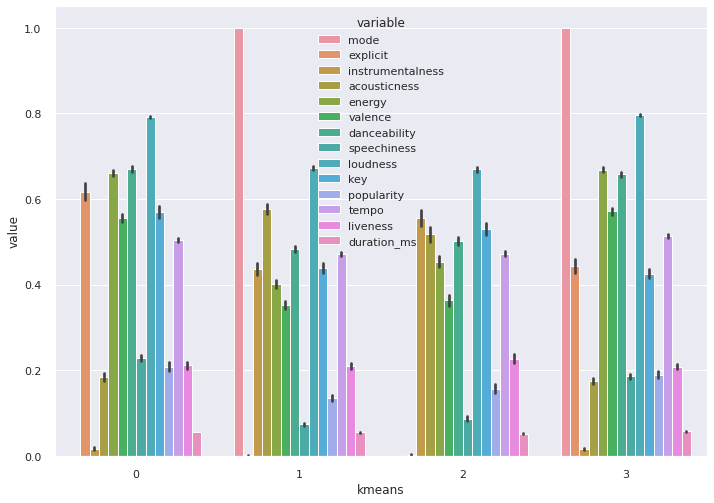

In [123]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_normalized))
df_scaled['kmeans'] = kmeans.labels_
df_mean = (df_scaled.loc[df_scaled.kmeans!=-1, :].groupby('kmeans').mean())

results = pd.DataFrame(columns=['variable', 'Var'])
sns.set(rc={'figure.figsize':(11.7,8.27)})
for column in df_mean.columns:
    results.loc[len(results), :] = [column, np.var(df_mean[column])]
selected_columns = list(results.sort_values('Var', ascending=False,).head(14).variable.values) + ['kmeans']
tidy = df_scaled[selected_columns].melt(id_vars='kmeans')
tidy["variable"].replace(index_label, inplace=True)
sns.barplot(x='kmeans', y='value', hue='variable', data=tidy)

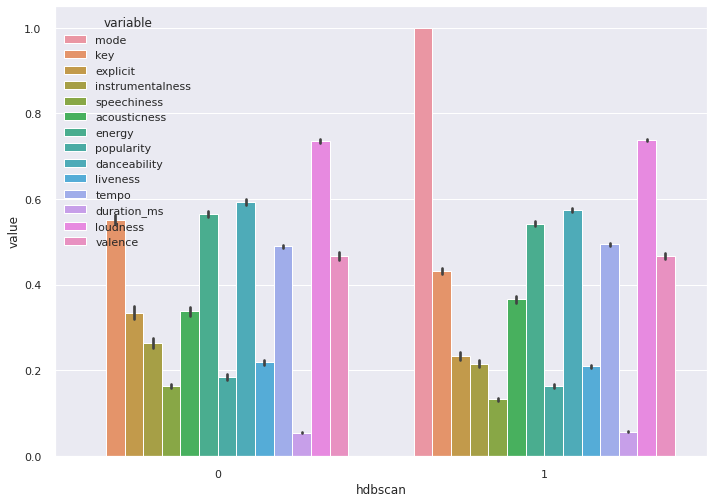

In [124]:
df_scaled = pd.DataFrame(scaler.fit_transform(df_normalized))
df_scaled['hdbscan'] = hdbscan_params_clusterer.labels_
df_mean = (df_scaled.loc[df_scaled.hdbscan!=-1, :].groupby('hdbscan').mean())

results = pd.DataFrame(columns=['variable', 'Var'])
sns.set(rc={'figure.figsize':(11.7,8.27)})
for column in df_mean.columns:
    results.loc[len(results), :] = [column, np.var(df_mean[column])]
selected_columns = list(results.sort_values('Var', ascending=False,).head(14).variable.values) + ['hdbscan']
tidy = df_scaled[selected_columns].melt(id_vars='hdbscan')
tidy["variable"].replace(index_label, inplace=True)
sns.barplot(x='hdbscan', y='value', hue='variable', data=tidy)

# Validação

O índice mínimo de Davies Bouldin é zero, com valores mais baixos indicando melhor agrupamento.


In [125]:
from sklearn.metrics import davies_bouldin_score
print("Índice davies bouldin para k-means: ", davies_bouldin_score(data, pred_kmeans))
print("Índice davies bouldin para hdbscan: ", davies_bouldin_score(data, pred_hdbscan))
print("Índice davies bouldin para hdbscan com tuning: ", davies_bouldin_score(data, pred_hdbscan_params))
print("Índice davies bouldin para dbscan: ", davies_bouldin_score(data, pred_dbscan))

Índice davies bouldin para k-means:  0.6687837646282291
Índice davies bouldin para hdbscan:  1.068482352964934
Índice davies bouldin para hdbscan com tuning:  0.9199737721302703
Índice davies bouldin para dbscan:  0.9199737721302703


Valores próximos de 1 para silhouette score são melhores.

In [126]:
from sklearn.metrics import silhouette_score, silhouette_samples
print("Índice silhouette para k-means: ", silhouette_score(data, pred_kmeans))
print("Índice silhouette para hdbscan: ", silhouette_score(data, pred_hdbscan))
print("Índice silhouette para hdbscan com tuning: ", silhouette_score(data, pred_hdbscan_params))
print("Índice silhouette para dbscan: ", silhouette_score(data, pred_dbscan))

Índice silhouette para k-means:  0.4976629368405004
Índice silhouette para hdbscan:  0.3866495624676586
Índice silhouette para hdbscan com tuning:  0.49515620509559655
Índice silhouette para dbscan:  0.49515620509559655


Silhouette plot de k-means para k entre 4 e 8

For n_clusters = 4 The average silhouette_score is : 0.4976629368405004
For n_clusters = 5 The average silhouette_score is : 0.5746084636621912
For n_clusters = 6 The average silhouette_score is : 0.6138816967673014
For n_clusters = 7 The average silhouette_score is : 0.606211522142682
For n_clusters = 8 The average silhouette_score is : 0.6010169055730399


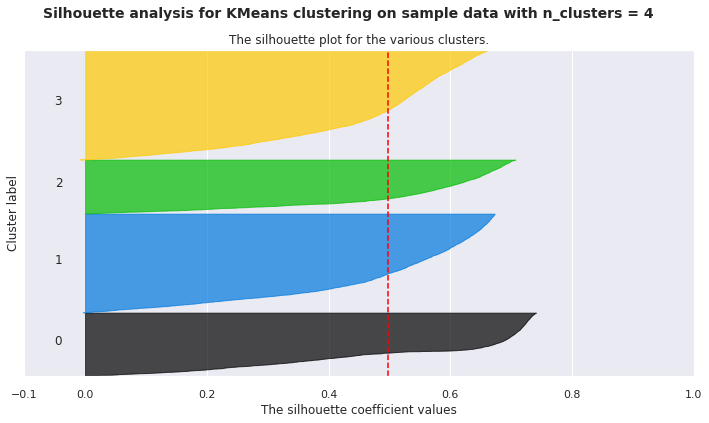

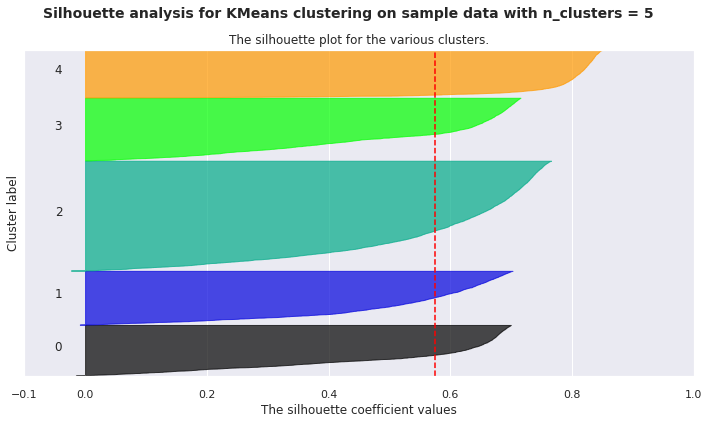

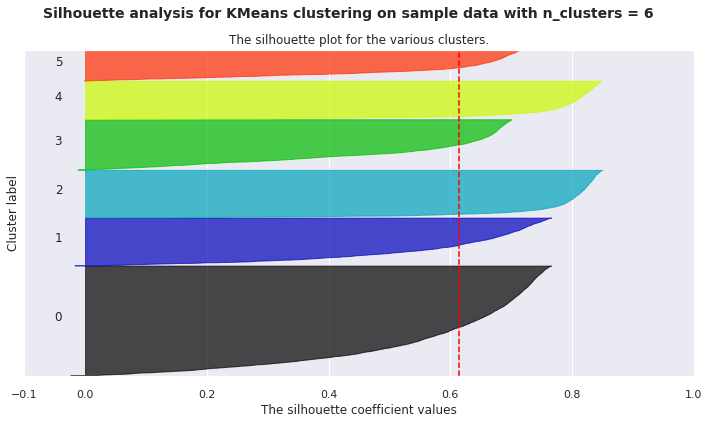

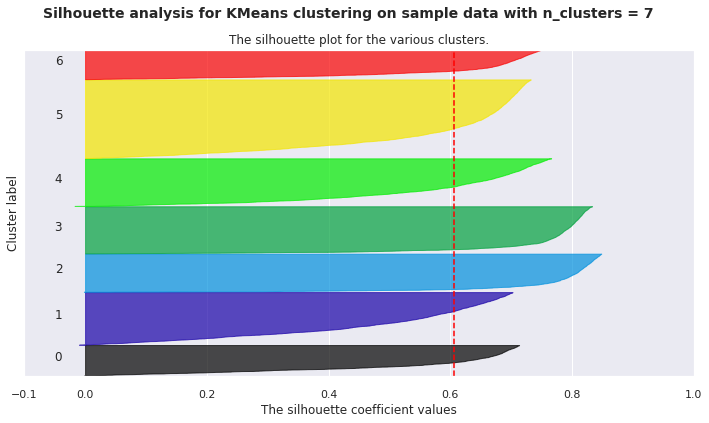

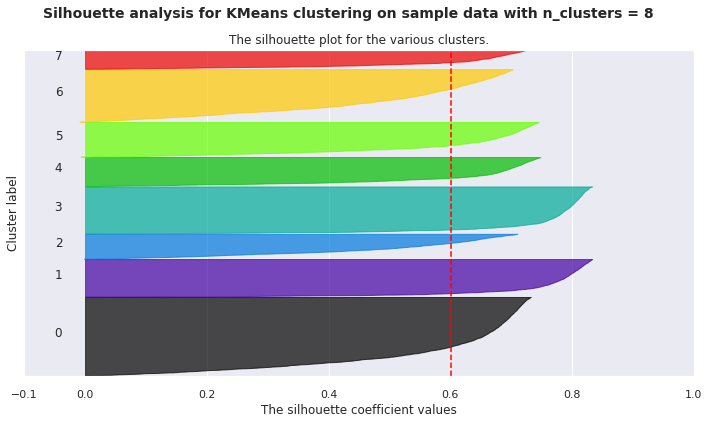

In [127]:
import matplotlib.cm as cm
range_n_clusters = [4, 5, 6, 7, 8]
for n_clusters in range_n_clusters:

    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(12, 6)

    ax1.set_xlim([-0.1, 1])
    
    ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(data)

    silhouette_avg = silhouette_score(data, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
       
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Verificando as novas característica com 6 clusters(melhor silhouette).

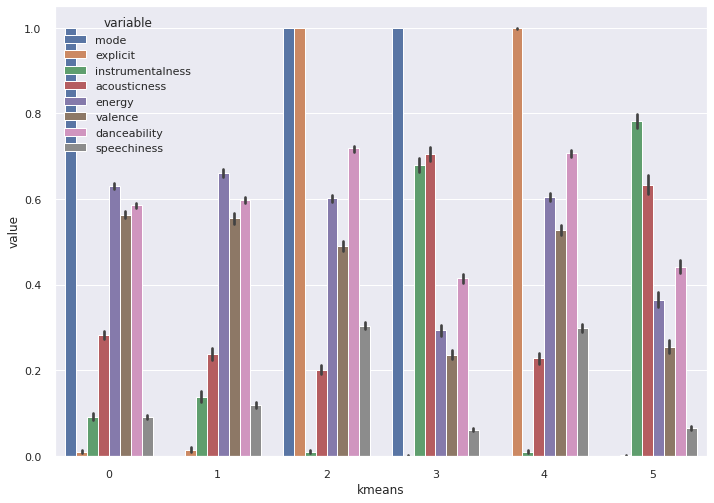

In [128]:
kmeans = KMeans(6, random_state=0)
kmeans.fit(data)
pred_kmeans = kmeans.predict(data)


scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_normalized))
df_scaled['kmeans'] = kmeans.labels_
df_mean = (df_scaled.loc[df_scaled.kmeans!=-1, :].groupby('kmeans').mean())

results = pd.DataFrame(columns=['variable', 'Var'])
sns.set(rc={'figure.figsize':(11.7,8.27)})
for column in df_mean.columns:
    results.loc[len(results), :] = [column, np.var(df_mean[column])]
selected_columns = list(results.sort_values('Var', ascending=False,).head(8).variable.values) + ['kmeans']
tidy = df_scaled[selected_columns].melt(id_vars='kmeans')
tidy["variable"].replace(index_label, inplace=True)
sns.barplot(x='kmeans', y='value', hue='variable', data=tidy)